# ch05.09. 사이킷런 실습 - 회귀분석

---
* 날짜:
* 이름:

## 학습내용
    - 사이킷런을 이용해 여러가지 회귀 모델을 사용한다.
    - 회귀 성능 지표에 대해 이해한다.
    - 회귀 분석 결과를 시각화 한다.

```
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 단순 회귀 분석
---

### **| 데이터 처리**



#### **주택 데이터 EDA**

[https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

    
<pre>
01. CRIM     도시의 인당 범죄율
02. ZN       2만 5,0000평방 피트가 넘는 주택 비율
03. INDUS    도시에서 소매 업종이 아닌 지역 비율
04. CHAS     찰스 강 인접 여부(강 주변=1, 그외=0)
05. NOX      일산화질소 농도(10ppm당)
06. RM       주택의 평균 방 개수
07. AGE      1940년 이전에 지어진 자가 주택 비율
08. DIS      다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
09. RAD      방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX      10만 달러당 재산세율
11. PTRATIO  도시의 학생-교사 비율
12. B        1000(Bk - 0.63)^2 도시의 아프리카계 미국인 비율
13. LSTAT    저소득층 비율
14. MEDV     자가 주택의 중간가격 (단위 $1000s)
</pre>

```
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
```

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


cols, norm = False, True

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
               'python-machine-learning-book-3rd-edition/'
               'master/ch10/housing.data.txt',
               header=None,
               sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(df.shape)
if cols:
  X = df[cols].values
else:
  X = df.drop(['MEDV'], axis=1)
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

if norm:
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    #스케일링 파라미터(평균, 분산) -> 트레이닝 셋
    #적용은 -> 트레이닝, 테스트
    #fit :학습(파라미터 찾기)
    #fit_transform : 학습과 동시에 파라미터 적용
    #transform : 파라미터 적용

    # trainset: 학습+변환
    #sc_x.fit(X_train)
    #sc_y.fit( np.expand_dims(y_train, 1) )

    X_train = sc_x.fit_transform(X_train)
    y_train = sc_y.fit_transform( np.expand_dims(y_train, 1) ).flatten()
    
    # testset : 변환만
    X_test = sc_x.transform(X_test)
    y_test = sc_y.transform( np.expand_dims(y_test, 1) ).flatten()
  return X_train, X_test, y_train, y_test

* 데이터 불러오기 및 기본 shape 확인

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

print(df.shape)
df.head(10)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


* 각 속성별 기본 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* 속성별 고유값 확인

In [ ]:
for col in df.columns:
  n_unique = len(df[col].unique())
  print(col, n_unique)

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
MEDV 229


* 속성별 분포 시각화

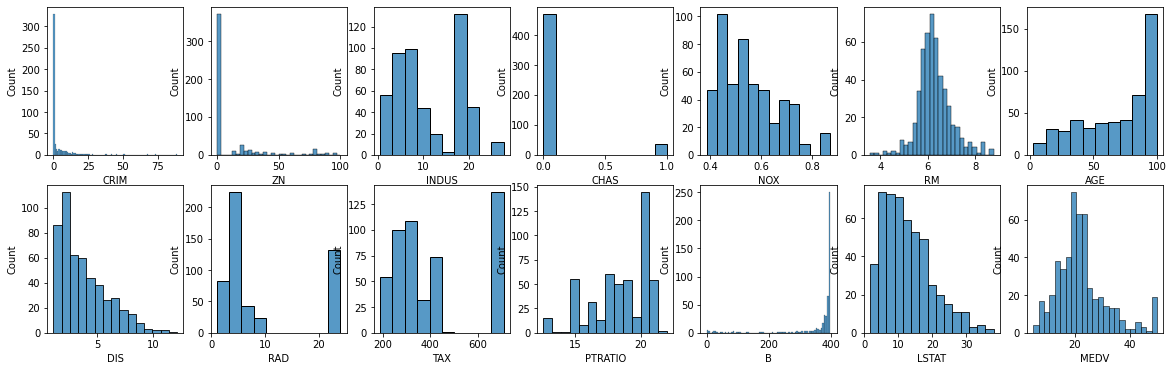

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(20,6))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 속성간 상관계수 시각화

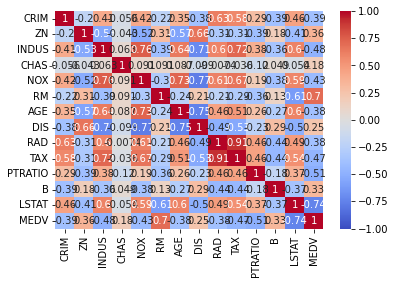

In [ ]:
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, cmap='coolwarm')

* 모든 속성간 산점도 그리기

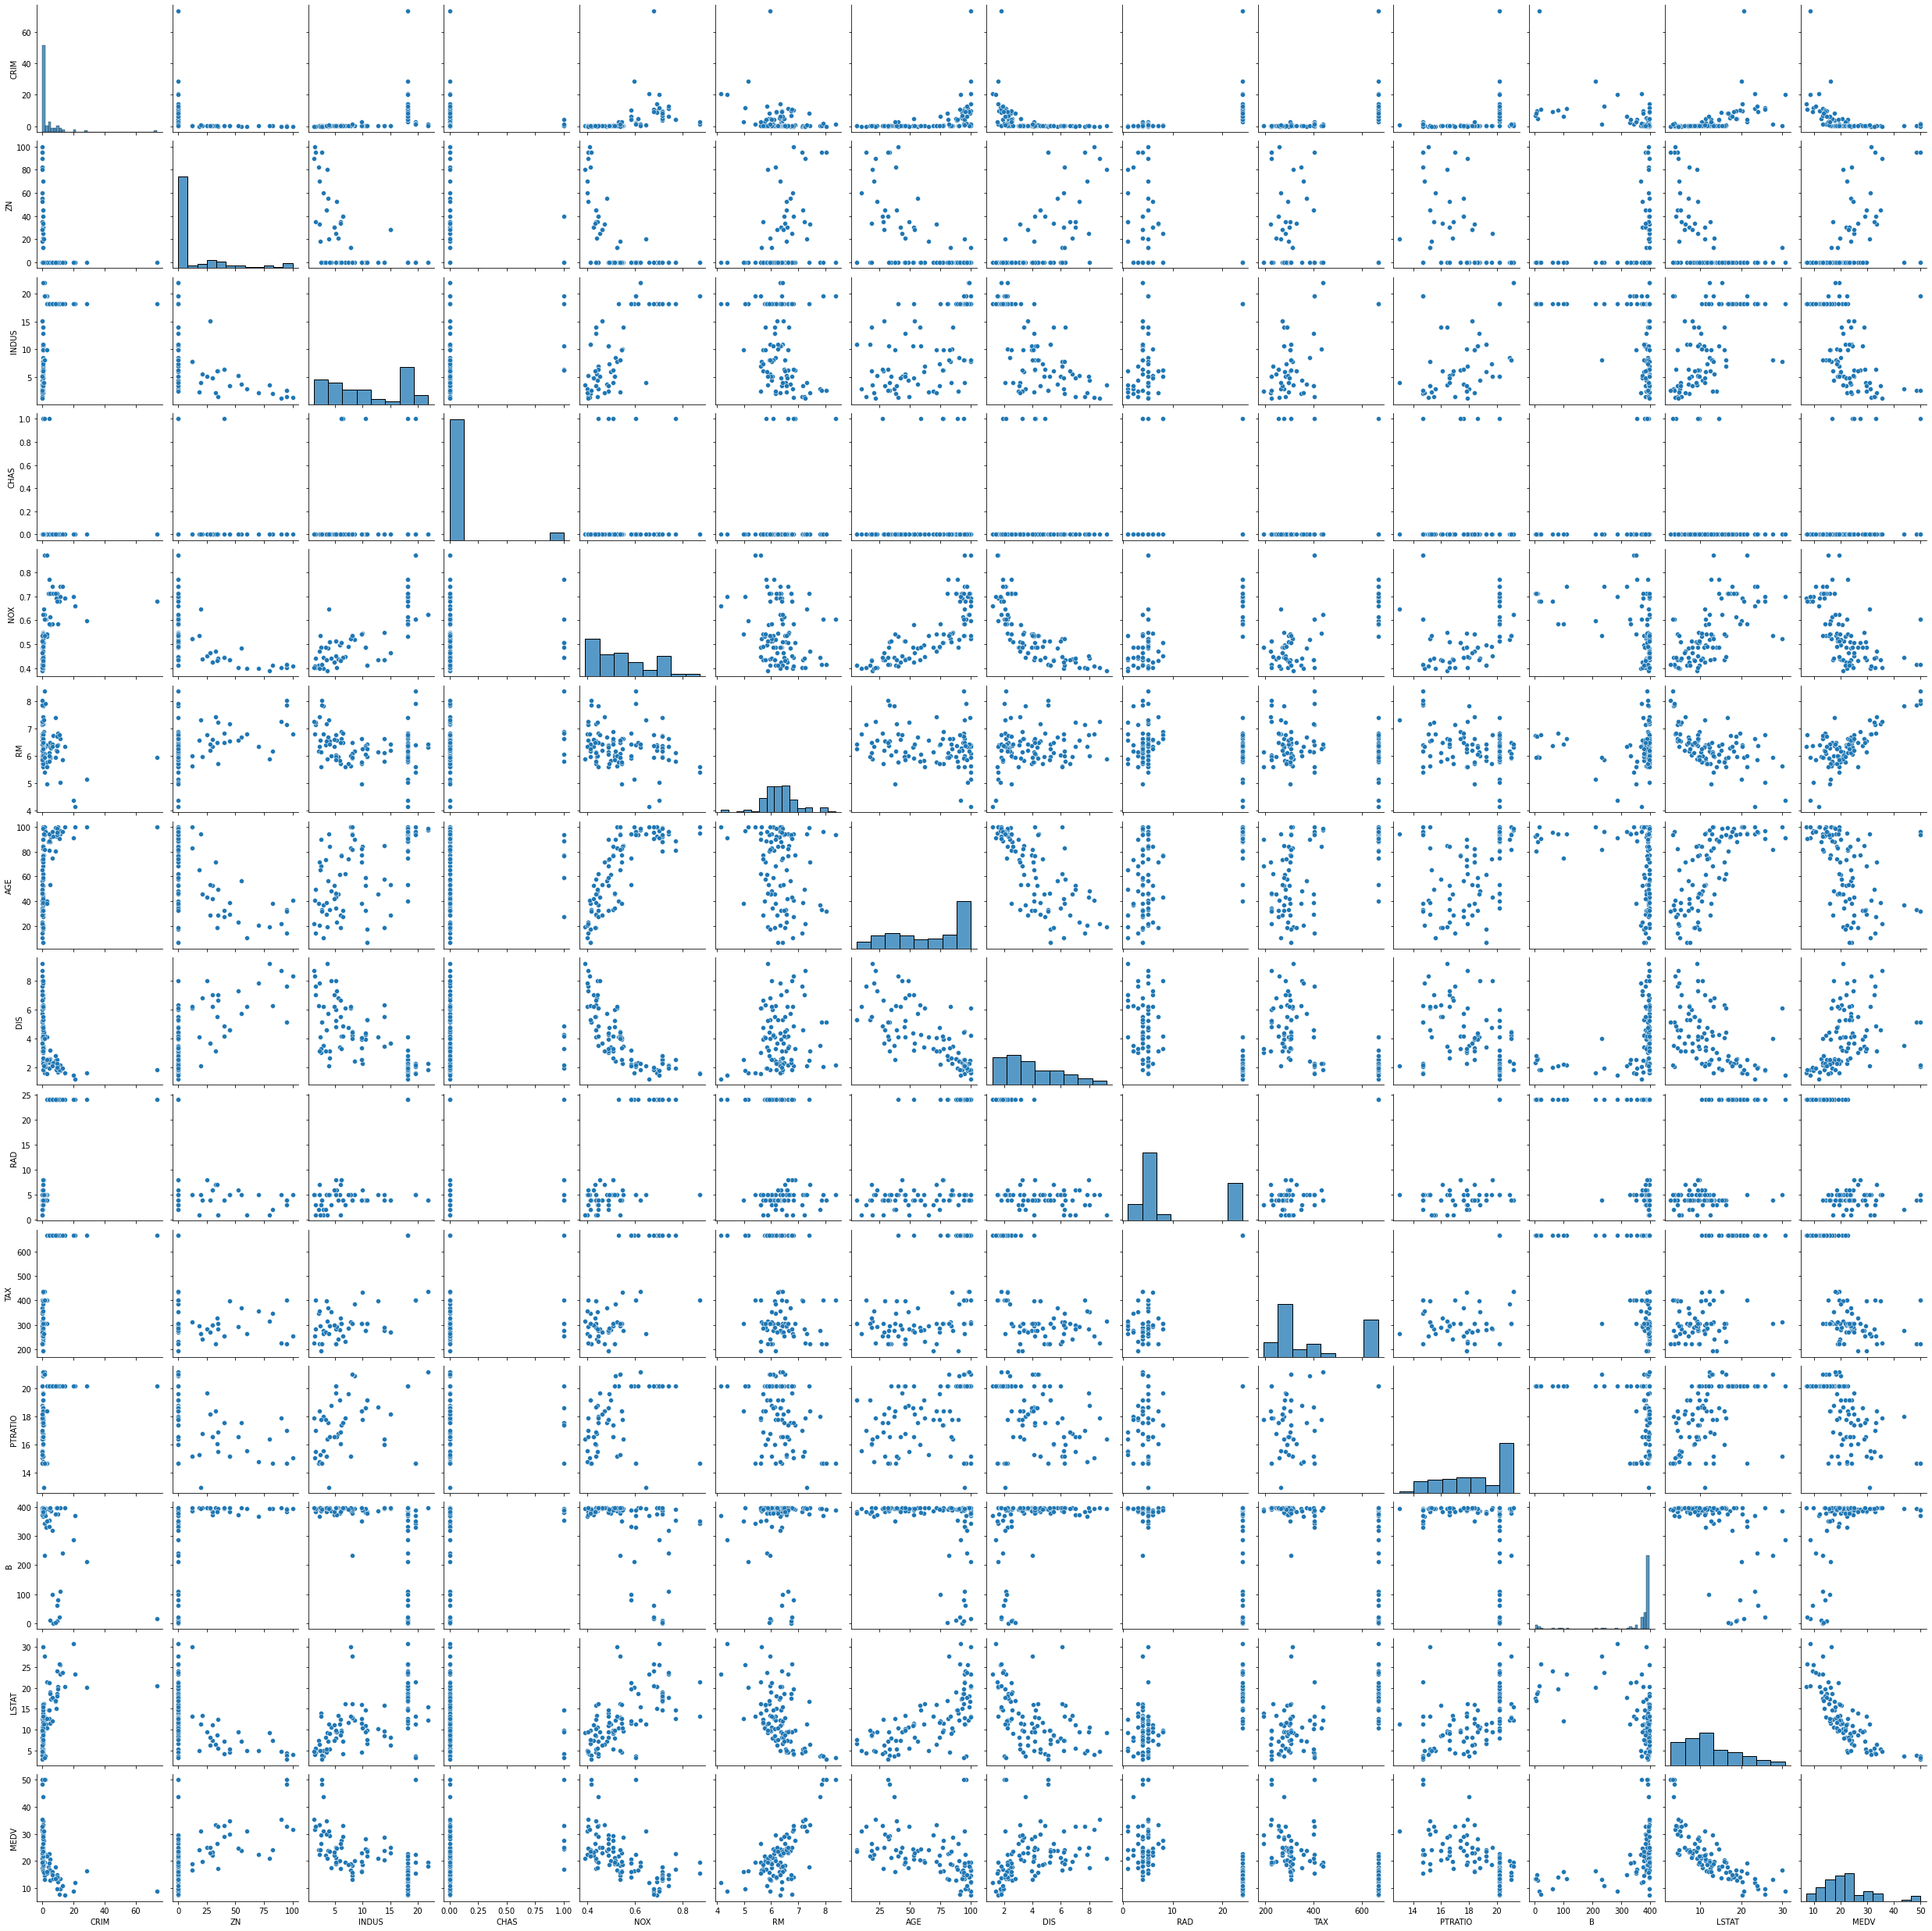

In [ ]:
sns.pairplot(data=df.sample(100))

#### **데이터 전처리**


* 넘파이 배열로 변환

In [ ]:
#df.values #넘파이 배열 변환
# 단순회귀 X:RM y: MEDV
X = df['RM'].values
y = df['MEDV'].values
#방법1
X = X.reshape(-1,1)
#방법2
#X = df[['RM']].values
X.shape, y.shape
# 모델 라이브러리에서의 암묵적인 룰
# 인풋 X는 2차 텐서(행렬)
# 아웃풋 y는 1차 텐서(벡터) / 단, 세개이상 카테고리면 행렬

((506, 1), (506,))

* 데이터 분할 (테스트 비율 0.2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404,), (102,))

* 스케일링 - 정규화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler() #x에 대한 정규화 mean, std가 정해지지 않음
sc_y = StandardScaler() #y에 대한 정규화 mean, std가 정해지지 않음
sc_x.fit(X_train) #인풋 X_train에 대한 mean, std 정해주기
sc_y.fit(y_train.reshape(-1,1)) #아웃풋 y_train에 대한 mean, std 정해주기
#fit 함수의 인풋은 2차 텐서

#sc_x 함수 : 데이터가 들어오면 x - x_train의 평균을 빼주고 / std_xtrain 분산으로 나눠준다.

StandardScaler()

* 훈련 데이터 정규화

In [ ]:
X_train = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()
X_train.shape, y_train.shape

((404, 13), (404,))

* 테스트 데이터 정규화

In [ ]:
X_test = sc_x.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test.reshape(-1,1)).flatten()
X_test.shape, y_test.shape

((102, 13), (102,))

### **| 모델링**

#### **직접 만든 회귀 클래스 사용**

* 클래스 구현

In [ ]:
class LinearRegressionGD():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    self.w = self.seed.normal(loc=0.0, scale = 0.01, size=1+X.shape[1])
  
  def model(self, X):
    '''
    X : (n_samples, n_features)
    w : (n_features+1)
    
    return : (n_samples, )
    '''
    return np.dot(X, self.w[:-1])+self.w[-1]

  def predict(self, X):
    return np.where(self.model(X) >= 0.5, 1, 0) 

  def loss(self, y, y_hat):
    return 1/2 * ( (y-y_hat)**2 )
    
  def evaluate(self, X, y):
    y_hat = self.model(X) # 예측
    loss = ( self.loss(y,y_hat).sum() ) / len(y) # 손실 평균
    return loss

  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[]) # history 초기화

    for epoch in range(epochs):
      # 최적화
      y_hat = self.model(X)
      self.w[:-1]+= self.lr * np.dot(X.T , (y-y_hat))
      self.w[-1] += self.lr * np.sum(y-y_hat)
      
      # 평가
      loss = self.evaluate(X, y)
      self.history['loss'].append(loss)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}')
      if show_params: print(self.w)

  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    y_hat = self.model(X)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

* 모델 로드 및 학습

In [ ]:
model = LinearRegressionGD()
history = model.fit(X_train, y_train, epochs=20)

[Epoch 0] loss: 0.35
[Epoch 1] loss: 0.3
[Epoch 2] loss: 0.28
[Epoch 3] loss: 0.28
[Epoch 4] loss: 0.28
[Epoch 5] loss: 0.28
[Epoch 6] loss: 0.28
[Epoch 7] loss: 0.27
[Epoch 8] loss: 0.27
[Epoch 9] loss: 0.27
[Epoch 10] loss: 0.27
[Epoch 11] loss: 0.27
[Epoch 12] loss: 0.27
[Epoch 13] loss: 0.27
[Epoch 14] loss: 0.27
[Epoch 15] loss: 0.27
[Epoch 16] loss: 0.27
[Epoch 17] loss: 0.27
[Epoch 18] loss: 0.27
[Epoch 19] loss: 0.27


* 학습곡선 그리기

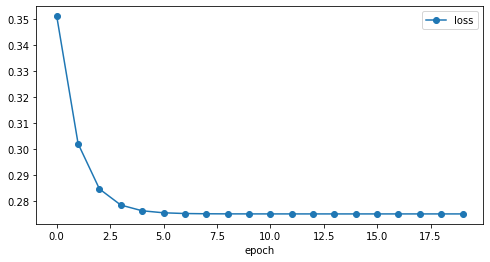

In [ ]:
model.draw_lcurve()

* 값 비교

성능:  0.27490410225215317


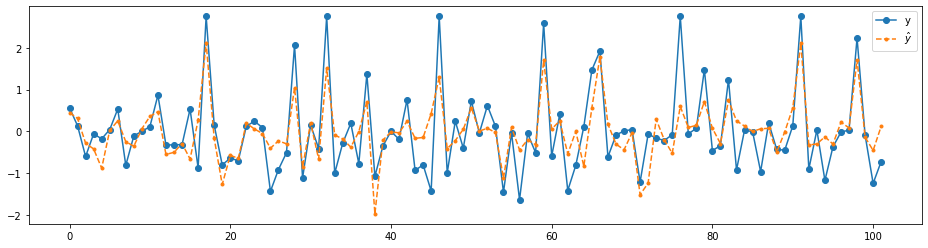

In [ ]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_test, y_test, figsize=(16,4))

* 기울기와 절편 구하기

\begin{align}
\hat{y} = wx+b
\end{align}

In [ ]:
w = model.w[0]
b = model.w[1]
print(f'기울기: {w:.3f}, 절편:{b:.3f}')

# MEDV 주택가격 = w(0.671) * 주택의 평균개수 + 0

기울기: 0.671, 절편:-0.000


* 회귀선 시각화

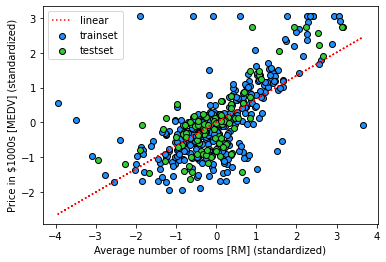

In [ ]:
plt.scatter(X_train, y_train             , label='trainset'    , c='dodgerblue', edgecolor='k')
plt.scatter(X_test, y_test             , label='testset'    , c='limegreen', edgecolor='k')
plt.plot(X_train, 0.671*X_train,                label='linear', color='r', linestyle=':')    
#X_every = np.arange(-4,4,0.1).reshape(-1,1)
#plt.plot(X_every, model.predict(X_every), label='linear', color='r', linestyle=':')    

plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.legend()
plt.show()

#### **사이킷런으로 추정**

* 모델 로드 및 학습

In [ ]:
from sklearn.linear_model import *
linear = LinearRegression() # 모델 클래스 가져오기
linear.fit(X_train, y_train) # 학습

LinearRegression()

* 기울기와 절편 구하기

\begin{align}
\hat{y} = wx+b
\end{align}

In [ ]:
w = linear.coef_[0] # 계수 = 가중치(weight)
b = linear.intercept_ # 절편 = 편향(bias)
print(f'기울기: {w:.3f}, 절편:{b:.3f}')

기울기: 0.671, 절편:0.000


* 회귀선 시각화

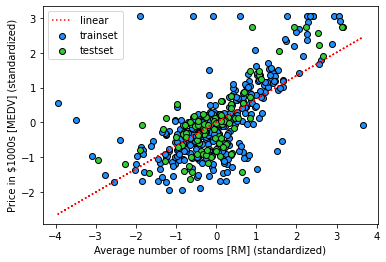

In [ ]:
plt.scatter(X_train, y_train             , label='trainset'    , c='dodgerblue', edgecolor='k')
plt.scatter(X_test, y_test             , label='testset'    , c='limegreen', edgecolor='k')
plt.plot(X_train, 0.671*X_train,                label='linear', color='r', linestyle=':')    
#X_every = np.arange(-4,4,0.1).reshape(-1,1)
#plt.plot(X_every, model.predict(X_every), label='linear', color='r', linestyle=':')    

plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.legend()
plt.show()

#### **RANSAC을 사용한 안정된 회귀모델 훈련**

- RANSAC (RANdom SAmple Consensus)
- 이상치를 효율적으로 다루는 알고리즘
- 이상치를 제거하는 대신 정상치(inlier) 라는 일부 데이터로 회귀 모델을 훈련

```
1. 랜덤하게 일부 샘플을 정상치로 선택하여 모델 훈련
2. 훈련된 모델에서 다른 모든 포인트를 테스트하여 사용자가 입력한 허용 오차 안에 속한 포인트를 정상치에 추가
3. 모든 정상치를 사용하여 모델을 재훈련
4. 훈련된 모델과 정상치 간의 오차 추정
5. 성능이 사용자가 지정한 임계 값에 도달하거나 지정된 반복 횟수에 도달하면 알고리즘 종료
```

* 모델 로드 및 훈련

In [ ]:
ransac = RANSACRegressor(LinearRegression(), # 사용할 모델
                         max_trials=100, # 최대 반복 횟수 
                         min_samples=50, # 랜덤하게 선택할 샘플의 최소 개수
                         loss='squared_error', #오차제곱,  절대값(absolut_error)
                         random_state=1
                         )

ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), loss='squared_error',
                min_samples=50, random_state=1)

* 학습 파라미터 확인

In [ ]:
w = ransac.estimator_.coef_[0] # 계수 = 가중치(weight)
b = ransac.estimator_.intercept_ # 절편 = 편향(bias)
print(f'기울기: {w:.3f}, 절편:{b:.3f}')

기울기: 0.708, 절편:0.041


* 정상치와 이상치 구분

In [ ]:
y_linear_pred = linear.predict(X_test)
y_ransac_pred = ransac.predict(X_test)

print( np.mean(( y_test-y_linear_pred)**2  ) )
print( np.mean(( y_test-y_ransac_pred)**2  ) )

0.4059098934088812
0.4009519683352657


In [ ]:
inlier_mask = ransac.inlier_mask_ # 정상치 데이터 마스크
outlier_mask = np.logical_not(ransac.inlier_mask_) # 이상치 데이터 마스크
inlier_mask.shape, outlier_mask.shape

((404,), (404,))

* 정상치와 이상치 데이터 시각화

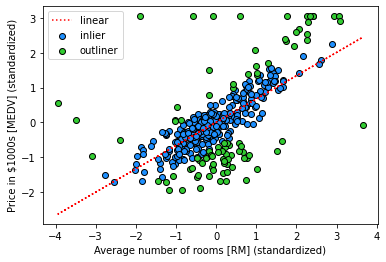

In [ ]:
plt.scatter(X_train[inlier_mask], y_train[inlier_mask]             , label='inlier'    , c='dodgerblue', edgecolor='k')
plt.scatter(X_train[outlier_mask], y_train[outlier_mask]             , label='outliner'    , c='limegreen', edgecolor='k')
plt.plot(X_train, 0.671*X_train,                label='linear', color='r', linestyle=':')    
#X_every = np.arange(-4,4,0.1).reshape(-1,1)
#plt.plot(X_every, model.predict(X_every), label='linear', color='r', linestyle=':')    

plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.legend()
plt.show()

### **| 회귀 성능 지표**

* 성능지표 함수 임포트

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

* 성능 확인을 위한 y 예측값 불러오기

In [ ]:
y_test.shape, y_linear_pred.shape

((102,), (102,))

#### **MSE (Mean Squared Error, 평균 제곱 오차)**

\begin{split}
\frac{1}{n} \sum^n_{i=1}(y_i - \hat{y_i})^2
\end{split}

In [ ]:
mean_squared_error(y_test, y_linear_pred)

0.4059098934088812

#### **RMSE (Root Mean Squared Error, 제곱근 평균 제곱 오차)**

\begin{split}
\sqrt{\frac{1}{n} \sum^n_{i=1}(y_i - \hat{y_i})^2}
\end{split}

In [ ]:
np.sqrt(mean_squared_error(y_test, y_linear_pred))

0.6371105817743739

#### **MAE (Mean Absolute Error, 평균 절대 오차)**

\begin{split}
\frac{1}{n} \sum^n_{i=1}|y_i - \hat{y_i}|
\end{split}

In [ ]:
mean_absolute_error(y_test, y_linear_pred)

0.4793490542043092

#### **NMAE (Noramlized Mean Absolute Error, 정규화된 평균 절대 오차)**

\begin{split}
\frac{MAE}{\frac{1}{n} \sum^n_{i=1}|y_i|} 
\end{split}

In [ ]:
mean_absolute_error(y_test, y_linear_pred) / np.mean(np.abs(y_test))

0.6890648265839221

#### **MAPE (Mean Absolute Percentage Error, 평균 절대 백분율 오차)**

\begin{split}
\frac{1}{n} \sum^n_{i=1} |\frac{y_i-\hat{y_i}}{y_i}| × 100 \
\end{split}

In [ ]:
np.mean(np.abs((y_test-y_linear_pred) / y_test)) * 100  

213.53004541981892

#### **SSE (Explained sum of squares)**

\begin{split}
\sum^n_{i=1} (\hat{y_i}-\bar{y})^2
\end{split}


In [ ]:
sse = np.sum((y_linear_pred-np.mean(y_test))**2)
sse

45.91956318529082

#### **SSR(Residual sum of squares)**

\begin{split}
\sum^n_{i=1} (y_i-\hat{y_i})^2
\end{split}

In [ ]:
ssr = np.sum((y_test-y_linear_pred)**2)
ssr

41.40280912770588

#### **SST(Total sum of squares)**

\begin{split}
\sum^n_{i=1} (y_i-\bar{y_i})^2
\end{split}

In [ ]:
sst = np.sum((y_test-np.mean(y_test))**2)
sst

101.99999999999999

#### **결정계수 $R^2$**
* $R^2$ 범위: 0과 1 사이 존재 (값이 1에 가까울수록 성능이 좋다)
* $R^2 = 1$: 현재 가지고 있는 x 변수로 y를 100% 설명 가능. 모든 관측치가 
* $R^2=0$: 현재 가지고있는 x변수로 y를 전혀 설명할 수 없다. 

\begin{split}
R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}
\end{split}

In [ ]:
ssr/sst

0.40590989340888123

In [ ]:
1-(sse/sst)

0.5498082040657762

In [ ]:
r2_score(y_test, y_linear_pred)

0.5940901065911188

* 함수 정리

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true-y_pred) / y_true) * 100

def norm_mean_absolute_error(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)/np.mean(np.abs(y_true))

def regression_scores(y_true,y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mae = mean_absolute_error(y_true, y_pred)
  nmae = norm_mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return {'mse':np.round(mse,3), 
          'rmse':np.round(rmse,3), 
          'mae':np.round(mae,3), 
          'nmae':np.round(nmae,3), 
          'mape':np.round(mape,3), 
          'r2':np.round(r2,3) }


regression_scores(y_test, y_linear_pred)

{'mae': 0.479,
 'mape': 24.23,
 'mse': 0.406,
 'nmae': 0.689,
 'r2': 0.594,
 'rmse': 0.637}

* 함수 사용하고 데이터프레임으로 나타내기

## 다중 회귀 분석
---

### **| 데이터 전처리**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

* 넘파이 배열로 변환

In [ ]:
df.values #넘파이 배열로 변환
df.head()

X = df.iloc[:,:-1]#나머지
y = df['MEDV'].values #MEDV
X.shape, y.shape

((506, 13), (506,))

* 데이터 분할 (테스트 비율 0.2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

* 스케일링 - 정규화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler() #x에 대한 정규화 mean, std가 정해지지 않음
sc_y = StandardScaler() #y에 대한 정규화 mean, std가 정해지지 않음
sc_x.fit(X_train) #인풋 X_train에 대한 mean, std 정해주기
sc_y.fit(y_train.reshape(-1,1)) #아웃풋 y_train에 대한 mean, std 정해주기
#fit 함수의 인풋은 2차 텐서

#sc_x 함수 : 데이터가 들어오면 x - x_train의 평균을 빼주고 / std_xtrain 분산으로 나눠준다.

* 훈련 데이터 정규화

In [ ]:
X_train = sc_x.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()
X_train.shape, y_train.shape

* 테스트 데이터 정규화

In [ ]:
X_test = sc_x.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test.reshape(-1,1)).flatten()
X_test.shape, y_test.shape

### **| 모델링**

* 여러가지 회귀 모델을 사용하여 회귀 분석 진행


#### **Linear regression**


\begin{split}
\min_{w} || X w - y||_2^2
\end{split}

In [ ]:
from sklearn.linear_model import *
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

#### **Ridge regression**


\begin{split}
\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2
\end{split}

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

#### **Lasso regression**

\begin{split}
\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}
\end{split}


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

#### **Elastic Net**


\begin{split}
\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}
\end{split}


In [ ]:
elastic = ElasticNet(alpha=0.1)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

#### **Bayesian Ridge Regression**


\begin{split}
p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p})
\end{split}

In [ ]:
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train,y_train)

BayesianRidge()

### **| 성능 비교**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* `regression_scores` 이용한 회귀 모델 성능 비교

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true-y_pred) / y_true) * 100

def norm_mean_absolute_error(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)/np.mean(np.abs(y_true))

def regression_scores(y_true,y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mae = mean_absolute_error(y_true, y_pred)
  nmae = norm_mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return {'mse':np.round(mse,3), 
          'rmse':np.round(rmse,3), 
          'mae':np.round(mae,3), 
          'nmae':np.round(nmae,3), 
          'mape':np.round(mape,3), 
          'r2':np.round(r2,3) }

In [ ]:
df_score = pd.DataFrame()
for model in ['linear', 'ridge', 'lasso', 'elastic', 'bayes_ridge']:
  y_pred = eval(model).predict(X_test)
  scores = pd.DataFrame(regression_scores(y_test, y_pred), index=[model])
  df_score = pd.concat([df_score, scores])
df_score.style.background_gradient(cmap='Greens_r')

,mse,rmse,mae,nmae,mape,r2
linear,23.381000,4.835000,3.751000,0.166000,18.776000,0.763000
ridge,23.307000,4.828000,3.741000,0.166000,18.743000,0.764000
lasso,24.716000,4.972000,3.772000,0.167000,18.959000,0.750000
elastic,25.312000,5.031000,3.801000,0.168000,18.938000,0.744000
bayes_ridge,24.814000,4.981000,3.775000,0.167000,18.870000,0.749000


* 실제값과 예측값의 산점도 그리기

Text(0, 0.5, 'y_pred')

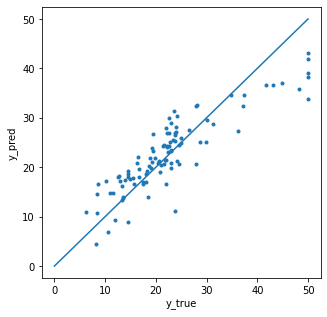

In [ ]:
plt.figure(figsize=(5,5))
y_pred = ridge.predict(X_test)
plt.scatter(y_test, y_pred, marker='.')
plt.plot([0,50],[0,50])
plt.xlabel('y_true')
plt.ylabel('y_pred')